In [35]:
# Step 4: Prepare Data for LSTM Model
# Scaling the data
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
scaled_features = scaler_features.fit_transform(df[['USD_Index', 'GDP', 'Oil_Price']])
scaled_target = scaler_target.fit_transform(df[['Gold_Price']])

In [36]:
# Create sequences for LSTM model
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_target)):
    X.append(np.hstack((scaled_features[i-sequence_length:i], scaled_target[i-sequence_length:i])))
    y.append(scaled_target[i])
X, y = np.array(X), np.array(y)

In [37]:
# Split into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
# Step 5: Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Single output for gold price prediction

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0932 - val_loss: 0.0086
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0244 - val_loss: 0.0926
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0142 - val_loss: 0.0282
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102 - val_loss: 0.0659
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0111 - val_loss: 0.0381
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0099 - val_loss: 0.0421
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0104 - val_loss: 0.0245
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0126 - val_loss: 0.0502
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0081 - val_loss: 0.0332
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0086 - val_loss: 0.0339
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0066 - val_loss: 0.0312
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0077 - val_loss: 0.0336
E

In [41]:
# Step 6: Model Predictions and Results Visualization
predictions = model.predict(X_test)
predictions = scaler_target.inverse_transform(predictions)
y_test_true = scaler_target.inverse_transform(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step


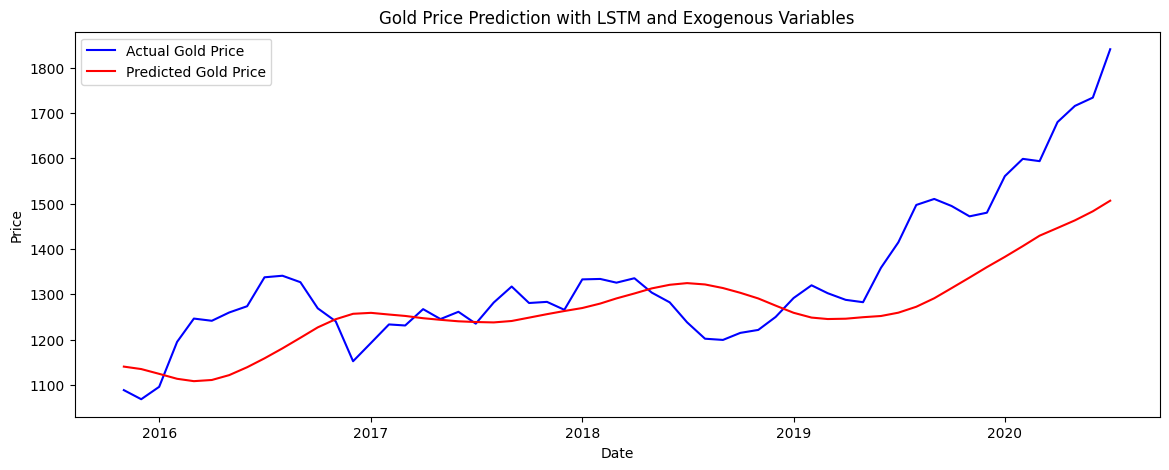

In [42]:
# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(df.index[-len(y_test):], y_test_true, color='blue', label='Actual Gold Price')
plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction with LSTM and Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_true, predictions)
mse = mean_squared_error(y_test_true, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_true - predictions) / y_test_true)) * 100

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Evaluation Metrics:
Mean Absolute Error (MAE): 95.49396609443535
Mean Squared Error (MSE): 14894.937525476618
Root Mean Squared Error (RMSE): 122.04481769201271
Mean Absolute Percentage Error (MAPE): 6.80304342360306%
